MSiA 422 – Winter 2017
Homework # 2
Jessica Chan  
# Sort Algorithms
-----------------------------------------------------------------------------------------------



## Bubble Sort

The sort function implements base on bubble sort algorithm. 
It takes up to three parameters:  
    - objects: a list can be numeric, string or comparable user defined objects
    - key: is a function that apply to the objects. For example, instead of compare the first alphebet of the strings, you can call key = len to compare the length of each string.
    - reversed: it is false by default and if it is true, the function will return the reversed list.
This function will return four things:
    - Sorted list
    - Number of comparisons
    - Number of swaps
    - Timer measure


In [50]:
import time

def sort(objects, key = lambda x:x, reversed = False):
    start = time.time()

    swapped = 1
    compare = 0
    swap = 0
    for passi in range(len(objects), -1, -1) :
        if swapped:
            swapped = 0
            for i in range(passi-1):
                compare +=1
                if key(objects[i])>key(objects[i+1]):
                    swap +=1
                    temp = objects[i]
                    objects[i] = objects[i+1]
                    
                    objects[i+1] = temp
                    swapped = 1

            passi =-1
    if reversed:
        end = time.time()
        objects = objects[::-1]
        return objects,compare,swap,end-start
    end = time.time()
    return objects,compare,swap,end-start



## Merge Sort

The sort function implements base on merge sort algorithm. 
It takes up to three parameters:  
    - objects: a list can be numeric, string or comparable user defined objects
    - key: is a function that apply to the objects. For example, instead of compare the first alphebet of the strings, you can call key = len to compare the length of each string.
    - reversed: it is false by default and if it is true, the function will return the reversed list.
This function will return four things:
    - Sorted list
    - Number of comparisons
    - Timer measure


In [51]:
def mergeSort(alist, key = lambda x:x, reversed = False):

    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        L, Lcomp = mergeSort(lefthalf)
        R, Rcomp = mergeSort(righthalf)
        compare = 0
        i=0 
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if key(lefthalf[i]) < key(righthalf[j]):
                compare +=1
                alist[k]=lefthalf[i]
                i=i+1
            else:
                compare +=1
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
        #print (alist)
        return (alist, compare+Lcomp+Rcomp)
    else:
        #print (alist)
        return (alist, 0)

def merge(alist, key = lambda x:x, reversed = False):
    start = time.time()
    L,compare = mergeSort(alist, key = lambda x:x, reversed = False)
    
        if reversed:
            end = time.time()
            objects = objects[::-1]
        return objects,compare,swap,end-start
    end = time.time()
    return (L, compare, start-end)
    
alist = [3,2,5,4,1]
mergeSort(alist)


IndentationError: unexpected indent (<ipython-input-51-2caacacad216>, line 44)

In [52]:
import random
def randword():
	s="".join(random.choice(string.ascii_letters) for _ in range(random.randint(1,10)))
	return s

def randelement():
	if random.randint(0,1)==0:
		return random.uniform(-10,10000)
	else:
		return randword()

def randlist(i):
	l = [random.uniform(-10,10000) for _ in range(i)]
	return l

bubble_L = []
merge_L = []


def test(maxi, inc):
    time1_L = []
    time2_L = []
    time1 = []
    time2 = []
    for i in range(0, maxi, inc):
        L = randlist(i)
        time1_L.append(sort(L))
        time2_L.append(merge(L))

        
    return time1_L,time2_L


### Test and plot

From the graph, we can see that merge sort is significantly faster than bubble sorts. The number of comparison is much smaller than bubble sort.

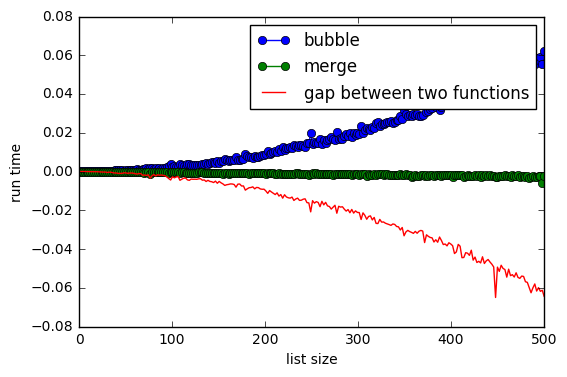

In [53]:
import matplotlib.pyplot as plt

import numpy as np

maxi = 500
inc = 2

x = np.linspace(0, maxi,maxi//inc)


time1_L,time2_L = test(maxi,inc)


time1 = list(map(lambda x: x[3],time1_L))
time2 = list(map(lambda x:x[2],time2_L))

time1 = np.array(time1)
time2 = np.array(time2)
gap= time2-time1


plt.plot(x,time1, label = 'bubble',linestyle='-', marker='o')
plt.plot(x,time2, label = 'merge',linestyle='-', marker='o')
plt.plot(x,gap,label = 'gap between two functions')
plt.xlabel('list size')
plt.ylabel('run time')
plt.legend()
plt.show()


In [54]:
import pandas as pd


pd.set_option('display.float_format', lambda x: '%.2f' % x)

compareplot = pd.DataFrame(list(map(lambda x: x[1:3],time1_L)),columns = ('bubble compare','bubble swap'))
compareplot['merge compare'] = pd.DataFrame(list(map(lambda x: x[1],time2_L)))


In [55]:
compareplot.describe()


,bubble compare,bubble swap,merge compare
count,250.00,250.00,250.00
mean,41090.52,20634.98,990.46
std,37025.31,18625.88,646.60
min,0.00,0.00,0.00
25%,7656.00,3722.00,426.75
50%,30738.50,15528.50,977.50
75%,68696.25,33671.00,1532.25
max,123225.00,63768.00,2203.00
